In [1]:
import pandas as pd
from sklearn import cluster, covariance, manifold
import numpy as np
from sklearn.metrics import r2_score
import math
import matplotlib.pyplot as plt
import time

In [2]:
# jan 16 2024- faz a cross validation (cv)
# not concluded it is doing something wrong calculating same value
#

In [3]:
import numpy as np
from scipy.optimize import differential_evolution

In [4]:
!pip install gdown==v4.6.3

In [5]:
!gdown 1ntRwkzL7SBkPIkf6nCpZG-xLmj8G_7su

Downloading...
From: https://drive.google.com/uc?id=1ntRwkzL7SBkPIkf6nCpZG-xLmj8G_7su
To: /content/custos_versao_jun_17_2023.xlsx
100% 29.5k/29.5k [00:00<00:00, 8.76MB/s]


In [6]:
# https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#sphx-glr-auto-examples-applications-plot-stock-market-py

In [7]:
df =pd.read_excel('custos_versao_jun_17_2023.xlsx')
df = df.drop(['Local','Barragens'],axis=1)


In [8]:
df.shape

(21, 79)

In [9]:
cluster_list_test = [['Area','altura','volume','mina', 'Movimentação de material (estéril ou rejeito)'],
                     ['Revisa','pilha_deposito','manute','Área já recuperada?', 'Remoção de barramento/dique'],
                     ['Estuda_levanta','ins_ind','patio_estoca','ponds','monitora', 'Possibilidade de mobilização de contaminantes?',
                      'Desmontagem e remoção de equipamentos, tubulações e estruturas metálicas','Focos erosivos'],
                     ['infra','Estrutura em operação?','Solo contaminado?','Drenagem superficial','Controle de focos erosivos',
                      'Preparação do solo','Fauna'],
                     ['custo_geral','Dados geotécnicos disponíveis?','Topografia disponível?', 'Dados geoquímicos ou de investigação disponíveis?'],
                     ['Estrutura estável ao final da operação?','FS aceitável ao final da operação?', 'Água superficial'],
                     ['Lago ao final da operação?','Vertimento ou bombeamento?','Instalação de sinalização'],
                     ['Custo_barragem','Presença de focos erosivos ao final da operação?','Água subterrânea contaminada?','Material de superficie/solo de cobretura contaminado?',
                      'Abertura de brecha','Retaludamento','Construção de vertedouro', 'Outras ações de fechamento', 'Focos erosivos.1'],
                     ['Preenchida com estéril ou rejeito ao final da operação?','Geotécnico','Sistemas de drenagem'],
                     ['Esgotamento de reservatório','Reconformação topográfica','Revegetação','Água subterrânea','Vegetação', 'Sistemas de drenagem.1',
                      'Vegetação.1']]

In [10]:
drop_columns=[1,2,3,8,9]
for idx in drop_columns:
  df.drop(cluster_list_test[idx],axis=1,inplace=True)

In [11]:
names = df.columns
k, list_ = 0, []
for test in df.std()== 0:
  if test == True:
    list_.append(names[k])
    print(names[k])
  k = k + 1
print(list_)

Risco à saúde humana?
Risco ecológico?
Planejamento
Desmontagem e demolições de estruturas
Barreira subsuperficial de baixa permeabilidade
Cobertura para quebra de capilaridade
Aterro de conquista para construção de cobretura
Cobertura impermeável
Impermeabilização de fundo
Remoção de solo contaminado
Desvio de curso d'água
Dragagem de sedimentos
Reforço de barramento
Selagem de acesso
Tamponamento de acesso
Escarificação do solo
Instalação de cerca
['Risco à saúde humana?', 'Risco ecológico?', 'Planejamento', 'Desmontagem e demolições de estruturas', 'Barreira subsuperficial de baixa permeabilidade', 'Cobertura para quebra de capilaridade', 'Aterro de conquista para construção de cobretura', 'Cobertura impermeável', 'Impermeabilização de fundo', 'Remoção de solo contaminado', "Desvio de curso d'água", 'Dragagem de sedimentos', 'Reforço de barramento', 'Selagem de acesso', 'Tamponamento de acesso', 'Escarificação do solo', 'Instalação de cerca']


<ipython-input-11-0cb4270aaeec>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  for test in df.std()== 0:


In [12]:
df = df.drop(list_, axis=1)
df.shape

(21, 32)

In [13]:
df.describe()

,Custo_barragem,Area,altura,volume,mina,custo_geral,Ano de encerramento da operação da estrutura,Dados geotécnicos disponíveis?,Topografia disponível?,Estrutura estável ao final da operação?,...,Movimentação de material (estéril ou rejeito),Retaludamento,Tamponamento de tulipa,Construção de vertedouro,Colocação do solo,Construção de berma de proteção,Instalação de sinalização,Outras ações de fechamento,Água superficial,Focos erosivos.1
count,2.100000e+01,21.000000,21.000000,2.100000e+01,2.100000e+01,2.100000e+01,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.0,21.000000,21.0,21.0,21.000000,21.000000,21.000000,21.000000
mean,2.919502e+07,195.312381,44.764762,4.671224e+07,2.455615e+07,3.657009e+07,2045.714286,0.904762,0.761905,0.904762,...,0.380952,0.095238,0.0,0.142857,0.0,0.0,0.476190,0.285714,0.857143,0.285714
std,4.114073e+07,249.618104,28.623733,9.501873e+07,1.726332e+07,2.022821e+07,26.788324,0.300793,0.436436,0.300793,...,0.497613,0.300793,0.0,0.358569,0.0,0.0,0.511766,0.462910,0.358569,0.462910
min,1.785789e+05,1.300000,8.000000,0.000000e+00,5.001354e+06,0.000000e+00,2004.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,6.426628e+06,30.000000,23.000000,1.300000e+06,1.717015e+07,2.186718e+07,2033.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
50%,1.038845e+07,89.000000,33.000000,7.150000e+06,1.717015e+07,4.160425e+07,2035.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
75%,3.928855e+07,242.000000,62.000000,3.000000e+07,2.423825e+07,5.520865e+07,2060.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000
max,1.536381e+08,856.000000,110.000000,3.440000e+08,7.239979e+07,5.520865e+07,2098.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [14]:
'''edge_model = covariance.GraphicalLassoCV(verbose=True)
X = df.copy()
X /= X.std(axis=0)
edge_model.fit(X)'''

'edge_model = covariance.GraphicalLassoCV(verbose=True)\nX = df.copy()\nX /= X.std(axis=0)\nedge_model.fit(X)'

In [15]:
X = df.copy()
X /= X.std(axis=0)

names = X.columns
new_drop = []
for word in names:
  list_ = X[word].values
  for w in list_:
    if math.isnan(w) == True :
      print(word)
      new_drop.append(word)
      #print(list_)
      break

print(X.shape)
X = X.drop(new_drop,axis=1)
print(X.shape)

Ano de fechamento da estrutura
Cobertura de baixa permeabilidade
Tratamento de efluentes
Tamponamento de tulipa
Colocação do solo
Construção de berma de proteção
(21, 32)
(21, 26)


<ipython-input-15-b25204677a14>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X /= X.std(axis=0)


In [16]:
pd.set_option('display.max_columns', None)
#X

In [17]:
new_drop =['As Built','Ano de encerramento da operação da estrutura']
X = X.drop(new_drop,axis=1)
#X

In [18]:
# delete this module if necessary
alphas = np.logspace(-1.5, 1, num=10)
edge_model = covariance.GraphicalLassoCV(alphas=alphas)

# standardize the time series: using correlations rather than covariance
# former is more efficient for structure recovery

edge_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_graph_lasso.py:268: RuntimeWarning: divide by zero encountered in scalar divide
  precision_[idx, idx] = 1.0 / (
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_graph_lasso.py:272: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_graph_lasso.py:273: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = -precision_[idx, idx] * coefs
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_graph_lasso.py:244: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001768983658547718, tolerance: 0.00014023161285414205
  coefs, _, _, _ = cd_

GraphicalLassoCV(alphas=array([ 0.03162278,  0.05994843,  0.11364637,  0.21544347,  0.40842387,
        0.77426368,  1.46779927,  2.7825594 ,  5.27499706, 10.        ]))

In [19]:
#X

In [20]:
_, labels = cluster.affinity_propagation(edge_model.covariance_, random_state=0)
n_labels = labels.max()

In [21]:
#X

In [22]:
names =X.columns
names

Index(['Custo_barragem', 'Area', 'altura', 'volume', 'mina', 'custo_geral',
       'Dados geotécnicos disponíveis?', 'Topografia disponível?',
       'Estrutura estável ao final da operação?',
       'FS aceitável ao final da operação?',
       'Presença de focos erosivos ao final da operação?',
       'Lago ao final da operação?', 'Vertimento ou bombeamento?',
       'Dados geoquímicos ou de investigação disponíveis?',
       'Água subterrânea contaminada?',
       'Material de superficie/solo de cobretura contaminado?',
       'Abertura de brecha', 'Movimentação de material (estéril ou rejeito)',
       'Retaludamento', 'Construção de vertedouro',
       'Instalação de sinalização', 'Outras ações de fechamento',
       'Água superficial', 'Focos erosivos.1'],
      dtype='object')

In [23]:
list_clusters= []
for i in range(n_labels + 1):
    print(f"Cluster {i + 1}: {', '.join(names[labels == i])}")
    list_clusters.append(list(names[labels == i]))

Cluster 1: Area, altura, volume, mina, Movimentação de material (estéril ou rejeito)
Cluster 2: custo_geral, Dados geotécnicos disponíveis?, Topografia disponível?, Dados geoquímicos ou de investigação disponíveis?
Cluster 3: Estrutura estável ao final da operação?, FS aceitável ao final da operação?, Água superficial
Cluster 4: Lago ao final da operação?, Vertimento ou bombeamento?, Instalação de sinalização
Cluster 5: Custo_barragem, Presença de focos erosivos ao final da operação?, Água subterrânea contaminada?, Material de superficie/solo de cobretura contaminado?, Abertura de brecha, Retaludamento, Construção de vertedouro, Outras ações de fechamento, Focos erosivos.1


In [24]:
list_clusters

[['Area',
  'altura',
  'volume',
  'mina',
  'Movimentação de material (estéril ou rejeito)'],
 ['custo_geral',
  'Dados geotécnicos disponíveis?',
  'Topografia disponível?',
  'Dados geoquímicos ou de investigação disponíveis?'],
 ['Estrutura estável ao final da operação?',
  'FS aceitável ao final da operação?',
  'Água superficial'],
 ['Lago ao final da operação?',
  'Vertimento ou bombeamento?',
  'Instalação de sinalização'],
 ['Custo_barragem',
  'Presença de focos erosivos ao final da operação?',
  'Água subterrânea contaminada?',
  'Material de superficie/solo de cobretura contaminado?',
  'Abertura de brecha',
  'Retaludamento',
  'Construção de vertedouro',
  'Outras ações de fechamento',
  'Focos erosivos.1']]

In [25]:
#df[names[labels == 7]]

In [26]:
#df[names[labels == 7]].columns

In [27]:
# the nodes (the stocks) on a 2D plane

from sklearn import manifold

node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver="dense", n_neighbors=6
)

embedding = node_position_model.fit_transform(X.T).T

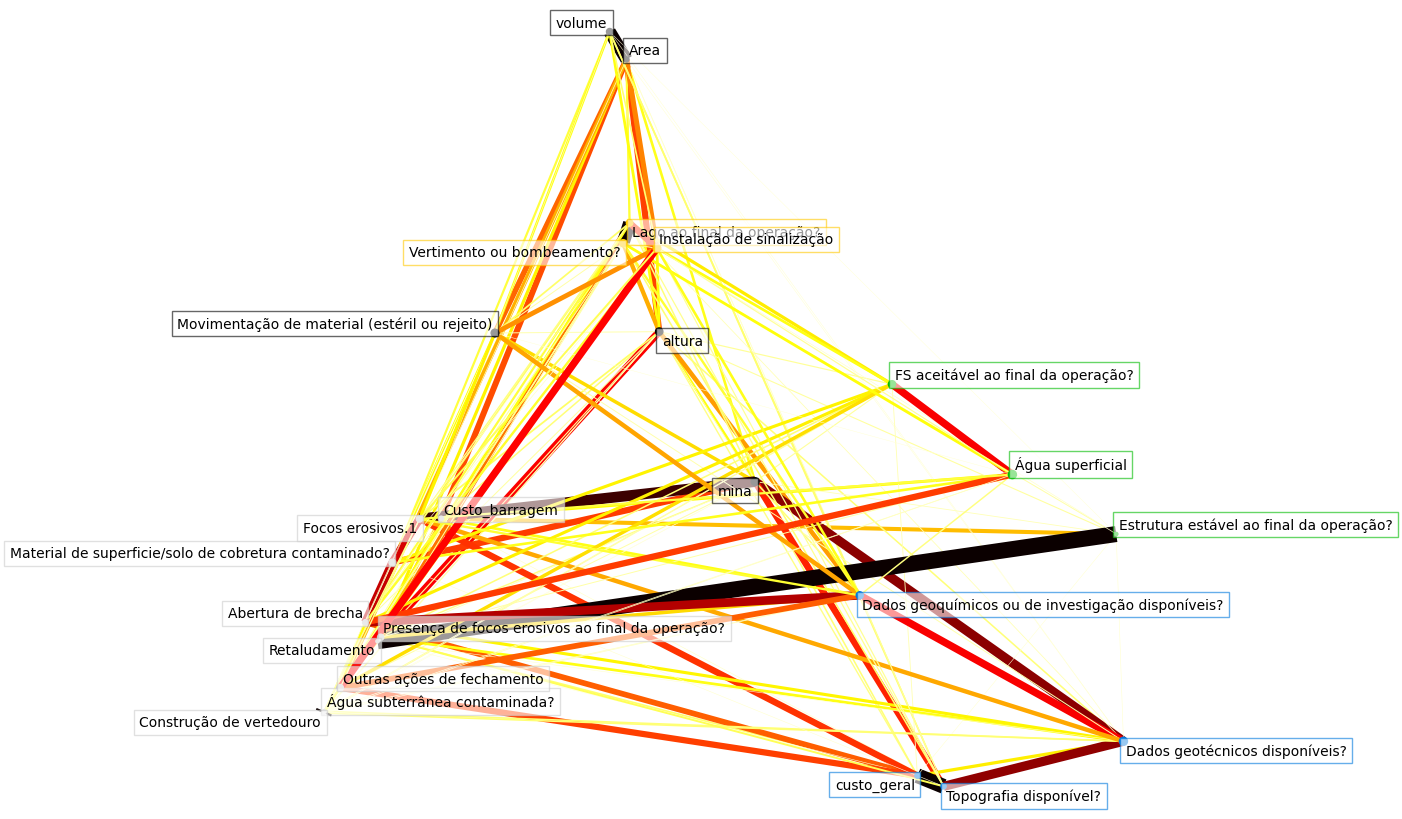

In [28]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

plt.figure(1, facecolor="w", figsize=(10, 8))
plt.clf()
ax = plt.axes([0.0, 0.0, 1.0, 1.0])
plt.axis("off")

# Plot the graph of partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = np.abs(np.triu(partial_correlations, k=1)) > 0.02

# Plot the nodes using the coordinates of our embedding
plt.scatter(
    embedding[0], embedding[1], s=100 * d**2, c=labels, cmap=plt.cm.nipy_spectral
)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [
    [embedding[:, start], embedding[:, stop]] for start, stop in zip(start_idx, end_idx)
]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(
    segments, zorder=0, cmap=plt.cm.hot_r, norm=plt.Normalize(0, 0.7 * values.max())
)
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(zip(names, labels, embedding.T)):
    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = "left"
        x = x + 0.002
    else:
        horizontalalignment = "right"
        x = x - 0.002
    if this_dy > 0:
        verticalalignment = "bottom"
        y = y + 0.002
    else:
        verticalalignment = "top"
        y = y - 0.002
    plt.text(
        x,
        y,
        name,
        size=10,
        horizontalalignment=horizontalalignment,
        verticalalignment=verticalalignment,
        bbox=dict(
            facecolor="w",
            edgecolor=plt.cm.nipy_spectral(label / float(n_labels)),
            alpha=0.6,
        ),
    )

plt.xlim(
    embedding[0].min() - 0.15 * np.ptp(embedding[0]),
    embedding[0].max() + 0.10 * np.ptp(embedding[0]),
)
plt.ylim(
    embedding[1].min() - 0.03 * np.ptp(embedding[1]),
    embedding[1].max() + 0.03 * np.ptp(embedding[1]),
)

plt.show()